<a href="https://colab.research.google.com/github/Celinekimm/E-commerce-Product-Images-Classification/blob/main/ProductImagesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving archive.zip to archive.zip


In [2]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d vikashrajluhaniwal/fashion-images

 97% 325M/335M [00:02<00:00, 138MB/s]
100% 335M/335M [00:02<00:00, 136MB/s]


In [4]:
!unzip fashion-images.zip -d fashion-images

Archive:  fashion-images.zip
  inflating: fashion-images/data/Apparel/Boys/Images/images_with_product_ids/10054.jpg  
  inflating: fashion-images/data/Apparel/Boys/Images/images_with_product_ids/10649.jpg  
  inflating: fashion-images/data/Apparel/Boys/Images/images_with_product_ids/10671.jpg  
  inflating: fashion-images/data/Apparel/Boys/Images/images_with_product_ids/12840.jpg  
  inflating: fashion-images/data/Apparel/Boys/Images/images_with_product_ids/12844.jpg  
  inflating: fashion-images/data/Apparel/Boys/Images/images_with_product_ids/12845.jpg  
  inflating: fashion-images/data/Apparel/Boys/Images/images_with_product_ids/12846.jpg  
  inflating: fashion-images/data/Apparel/Boys/Images/images_with_product_ids/12847.jpg  
  inflating: fashion-images/data/Apparel/Boys/Images/images_with_product_ids/13306.jpg  
  inflating: fashion-images/data/Apparel/Boys/Images/images_with_product_ids/13343.jpg  
  inflating: fashion-images/data/Apparel/Boys/Images/images_with_product_ids/1504

In [5]:
!pip install split-folders

In [6]:
!mv /content/fashion-images/data/Footwear/Men/Images/images_with_product_ids/* /content/fashion-images/data/Footwear/Men
!mv /content/fashion-images/data/Footwear/Women/Images/images_with_product_ids/* /content/fashion-images/data/Footwear/Women

In [7]:
import splitfolders
splitfolders.ratio('/content/fashion-images/data/Footwear/', output='Source', seed=133, ratio=(0.7, 0.1, 0.2))

Copying files: 1580 files [00:00, 1841.74 files/s]


In [8]:
train_dir = "/content/Source/train" # 80 10 10
test_dir = "/content/Source/test"
val_dir = "/content/Source/val"

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(# rotation_range = 30, #Get rid of this? // augmentation
                                   # zoom_range = 0.2, #Get rid of this
                                   # width_shift_range = 0.1, #Get rid of this
                                   height_shift_range = 0.1, #Keep it for tall shoes
                                   # horizontal_flip = True, #Not needed
                                   channel_shift_range=0.25,
                                   zoom_range=0.2,
                                   rescale = 1./255) # Maybe add a color changer, contrast?
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
batch_size = 32
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64), 
                                                 batch_size = batch_size, 
                                                 class_mode = "binary")
val_set = val_datagen.flow_from_directory(val_dir,
                                          target_size = (64, 64),
                                          batch_size = batch_size,
                                          class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

Found 1105 images belonging to 2 classes.
Found 157 images belonging to 2 classes.
Found 318 images belonging to 2 classes.


In [11]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

cnn = Sequential()

In [12]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=2, strides=2, padding='SAME'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=2, strides=2, padding='SAME'))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(1, activation='sigmoid')) # softmax

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 64)       256       
 hNormalization)                                                 
                                                        

In [14]:
from keras import losses

cnn.compile(optimizer = 'adam', 
            loss = losses.BinaryCrossentropy(), 
            metrics = ['Accuracy']) #Recall

history = cnn.fit(training_set, validation_data = val_set, epochs = 10)

Epoch 1/10
35/35 [==============================] - 70s 2s/step - loss: 1.0898 - Accuracy: 0.6416 - val_loss: 0.7838 - val_Accuracy: 0.4841
Epoch 2/10
35/35 [==============================] - 57s 2s/step - loss: 0.5884 - Accuracy: 0.7068 - val_loss: 0.7302 - val_Accuracy: 0.4841
Epoch 3/10
35/35 [==============================] - 56s 2s/step - loss: 0.5365 - Accuracy: 0.7376 - val_loss: 0.7217 - val_Accuracy: 0.4841
Epoch 4/10
35/35 [==============================] - 56s 2s/step - loss: 0.5465 - Accuracy: 0.7394 - val_loss: 0.6731 - val_Accuracy: 0.5032
Epoch 5/10
35/35 [==============================] - 56s 2s/step - loss: 0.4869 - Accuracy: 0.7575 - val_loss: 0.6972 - val_Accuracy: 0.4841
Epoch 6/10
35/35 [==============================] - 57s 2s/step - loss: 0.4823 - Accuracy: 0.7412 - val_loss: 0.6345 - val_Accuracy: 0.5987
Epoch 7/10
35/35 [==============================] - 56s 2s/step - loss: 0.4641 - Accuracy: 0.7692 - val_loss: 0.6927 - val_Accuracy: 0.5032
Epoch 8/10
35/35 [==

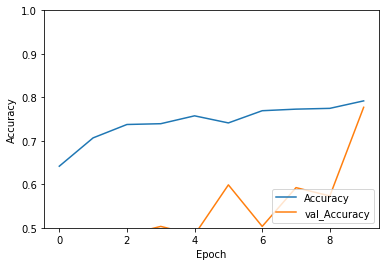

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['Accuracy'], label='Accuracy')
plt.plot(history.history['val_Accuracy'], label = 'val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [16]:
test_loss, test_recall = cnn.evaluate(test_set)

10/10 [==============================] - 14s 1s/step - loss: 0.5524 - Accuracy: 0.7767
